In [40]:
import pandas as pd
import matplotlib.pyplot as plt

from glob import glob
import os

In [41]:
# Read our results

data = dict()

results_csvs = glob(os.path.join(os.pardir, "results", "*.csv"))
for file_path in results_csvs:
    df = pd.read_csv(file_path)
    file_name = file_path.split("/")[-1]
    instance_name = file_name.split("_")[0]
    method_name = file_name.split("_")[-1].strip(".csv")
    if instance_name not in data.keys():
        data[instance_name] = dict()
    data[instance_name][method_name] = df
data

{'esc128.dat': {'walk':    run                                           solution  evaluation  \
  0    0  [89, 26, 105, 31, 67, 79, 83, 39, 47, 29, 10, ...         208   
  1    1  [94, 21, 42, 120, 83, 2, 121, 59, 5, 39, 93, 2...         222   
  2    2  [70, 19, 98, 110, 103, 113, 9, 22, 61, 65, 45,...         232   
  3    3  [33, 93, 11, 102, 118, 80, 110, 104, 16, 59, 3...         214   
  4    4  [56, 39, 115, 6, 78, 82, 103, 106, 31, 76, 32,...         224   
  5    5  [88, 62, 57, 70, 53, 106, 7, 35, 23, 65, 82, 1...         230   
  6    6  [32, 64, 34, 83, 0, 46, 23, 65, 33, 74, 89, 14...         224   
  7    7  [77, 21, 99, 75, 119, 95, 122, 60, 9, 121, 19,...         222   
  8    8  [33, 16, 13, 108, 100, 72, 111, 21, 53, 89, 5,...         230   
  9    9  [68, 83, 84, 6, 52, 32, 40, 74, 104, 111, 73, ...         226   
  
     iterations  time  
  0           0  1008  
  1           0  1007  
  2           0  1006  
  3           0  1006  
  4           0  1007  
  5   

In [42]:
# Read solutions
data_path = os.path.join(os.pardir, "data", "qapdatsol")
for instance in data.keys():
    solution_file = instance[:-3] + "sln"
    print(solution_file)
    full_path = os.path.join(data_path, solution_file)

    f = open(full_path, "r")
    first_line = f.readline().strip().split(" ")
    n, opt = int(first_line[0]), float(first_line[-1])
    data[instance]["n"] = n
    data[instance]["opt"] = opt
    opt_sol = []
    while True:
        line = f.readline()
        if not line:
            break
        elements = [ele for ele in line.strip().split(" ") if len(ele) > 0]
        # Additional comma split if necessary
        if len(elements) == 1:
            elements = elements[0].split(",")
        elements = list(map(int, elements))
        opt_sol.extend(elements)
    f.close()

esc128.sln
nug15.sln
chr12a.sln
nug30.sln
els19.sln
had20.sln
bur26c.sln


In [43]:
# Sort instances by size
data = dict(sorted(data.items(), key=lambda tup: tup[1]["n"], reverse=True))

In [44]:
for instance in data.keys():
    print(instance, data[instance].keys())

esc128.dat dict_keys(['walk', 'heuristi', 'random', 'n', 'opt'])
nug30.dat dict_keys(['random', 'walk', 'heuristi', 'n', 'opt'])
bur26c.dat dict_keys(['heuristi', 'random', 'walk', 'n', 'opt'])
had20.dat dict_keys(['walk', 'heuristi', 'random', 'n', 'opt'])
els19.dat dict_keys(['walk', 'heuristi', 'random', 'n', 'opt'])
nug15.dat dict_keys(['walk', 'heuristi', 'random', 'n', 'opt'])
chr12a.dat dict_keys(['random', 'walk', 'heuristi', 'n', 'opt'])


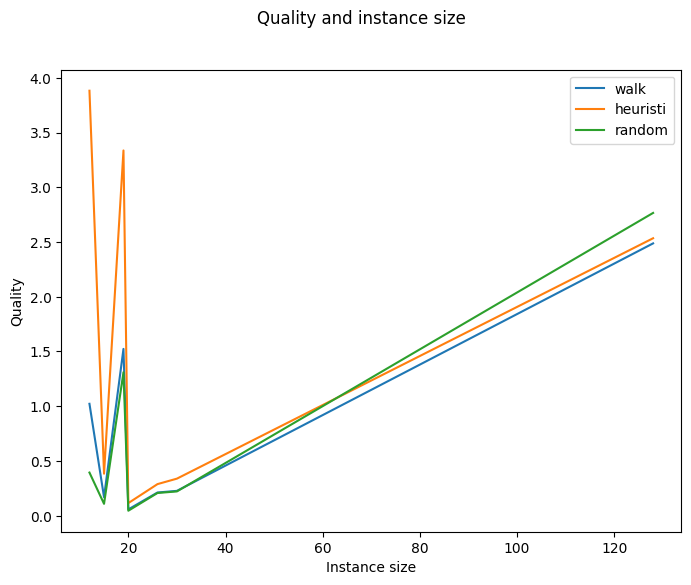

In [45]:
fig, ax = plt.subplots(figsize = (8,6))

instance_sizes = [data[instance]["n"] for instance in data.keys()]
methods = ['walk', 'heuristi', 'random']

for method in methods:
    avg_qualities = []
    for instance in data.keys():
        avg_quality = data[instance][method]["evaluation"].mean()
        diff = (avg_quality - data[instance]["opt"])/data[instance]["opt"]
        avg_qualities.append(diff)
    ax.plot(instance_sizes, avg_qualities, label = method)
    ax.set_xlabel("Instance size")
    ax.set_ylabel("Quality")

fig.suptitle("Quality and instance size")
plt.legend()